# MNIST digit recognition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import warnings
warnings.simplefilter("ignore")

# Take some seed
np.random.seed(241)

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

C:\Users\Asus\AppData\Local\Programs\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


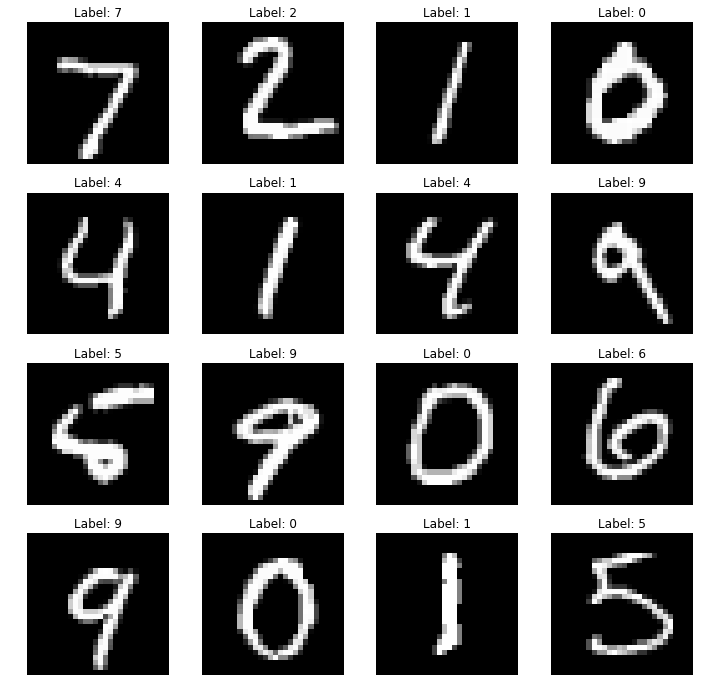

In [2]:
plt.figure(figsize=[12, 12])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title("Label: %i"%y_test[i])
    plt.imshow(X_test[i].reshape([28, 28]),cmap='gray')
    plt.axis('off')
plt.show()

In [3]:
# Reshape data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalize data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert labels to categories
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [4]:
# Create sequential model
model = Sequential()

model.add(Dense(800, input_dim=784, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
history = model.fit(X_train, Y_train, batch_size=100, epochs=100, validation_split=0.2, verbose=0)

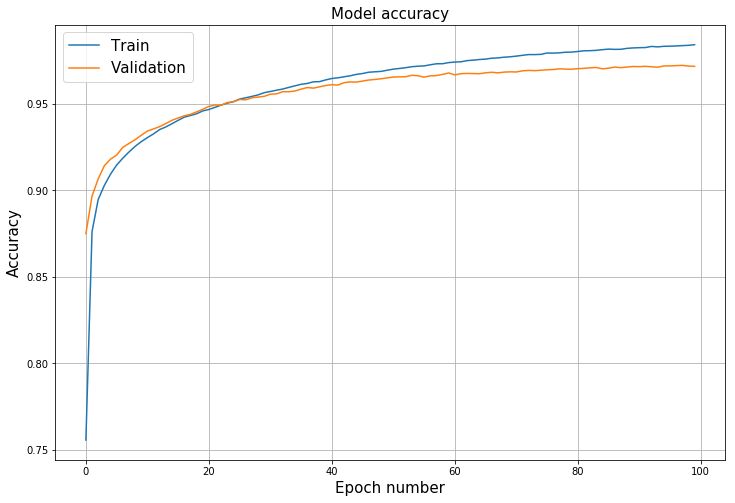

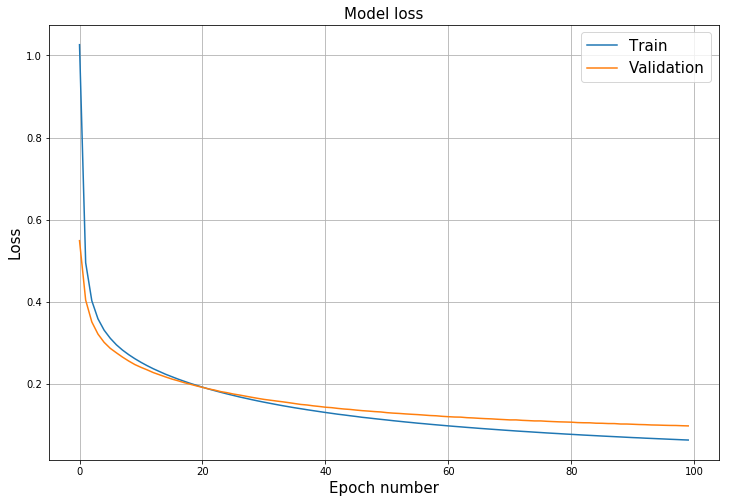

In [6]:
# Accuracy

plt.figure(figsize=(12,8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy', size=15)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch number', size=15)
plt.legend(['Train', 'Validation'], loc='upper left', fontsize=15)
plt.grid()
plt.show()

# Loss

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', size=15)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch number', size=15)
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper right', fontsize=15)
plt.show()

In [7]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test accuracy: %.2f%%" % (scores[1]*100))

Test accuracy: 97.26%


In [8]:
pred = model.predict(X_test)

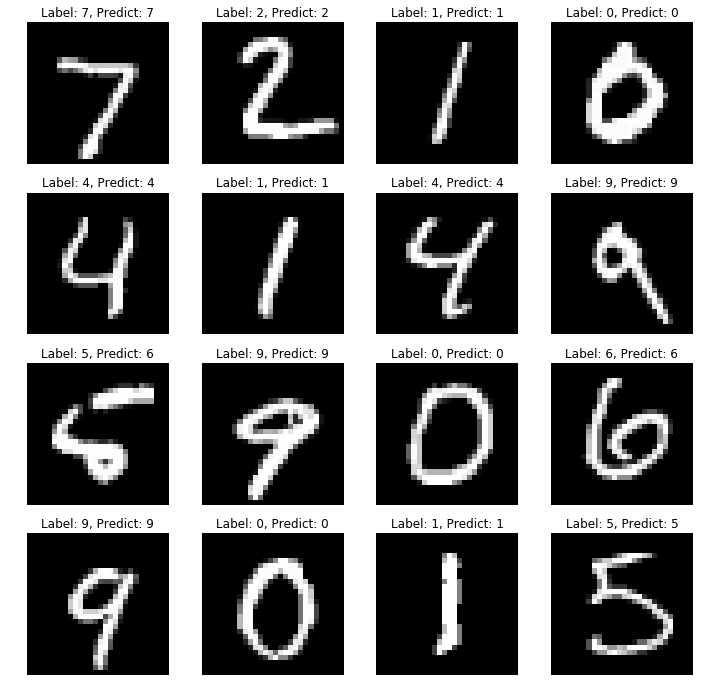

In [9]:
plt.figure(figsize=[12, 12])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title("Label: {}, Predict: {}".format(y_test[i], np.argmax(pred[i])))
    plt.imshow(X_test[i].reshape([28, 28]),cmap='gray')
    plt.axis('off')
plt.show()